<a href="https://colab.research.google.com/github/Mwadz/KNN-and-The-Naive-Bayes-Classifier/blob/Final-KNN-classifier/K_nearest_neighbor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=orange>**Rubric**</font>

> To implement the KNN Classifier following the best practices of optimization. These include:
* feature selection
* splitting the data into subsets to use in modeling. 

> To interpret the feature selection done and models created.

> To exhaustively apply exploratory data analysis approaches while defining:
  * the question
  * the metric for success
  * the context
  * the experimental design taken
  * the appropriateness of the available data to answer the given question.

> To find and deal with: 
* outliers
* anomalies
* missing data 

> To interpret and challenge the solution by providing insights on why and how I can make improvements.

>To submit a well written documentation clearly explaining what the code is accomplishing and how.

> To present a comprehensive conclusion well articulated based on the findings.


# Question Definition
**a) Objective**
To determine whether a passenger survived the accident or not.

**b) Success Metric**
Delivering a model that predicts whether na passenger survived the titanic accident or not with an accuracy of at least 80%

**c) Context**
Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest unforgatable commercial marine disasters.

**d) Experimental Design**
The process will entail:
> Read and explore the given dataset.

> Defining the appropriateness of the available data to answer the given question.

> Finding and deal with outliers, anomalies, and missing data within the dataset.

> Perform Exploratory data analysis and recording my observations.

> Building the classification models using KNN using different dataset splits(80-20, 70-30, 60-40) for the train and test set and make observations of the model performance.

> Optimizing the model performance and challenging the solution
> Giving a conclusion and recommendations from the analysis.

**e) Data Relevance**

The data provided is very relevant and has a wide range of variables to consider in achieving our main objective of this project.The variables include:

    Survived: This feature has value 0 and 1. 0 for not survived and 1 for survived.

    Pclass: There are 3 classes: Class 1, Class 2 and Class 3.

    Name: Name of passenger.

    Sex: Gender of passenger.

    Age: Age of passenger.

    SibSp: Indication that passengers have siblings and spouses.

    Parch: Whether a passenger is alone or has a family.

    Ticket: Ticket number of passenger.

    Fare: Indicating the fare.

    Cabin: The cabin of passenger.

    Embarked: The port embarked category; C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
#@title Importing Libraries
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Loading the datasets
train = pd.read_csv('/content/train (5) (1).csv')
test = pd.read_csv('/content/test (1).csv')

[train](https://archive.org/download/train5_202002/train%20%285%29.csv)

[test](https://archive.org/download/test1_202002/test%20%281%29.csv)

In [ ]:
# previewing the datasets
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


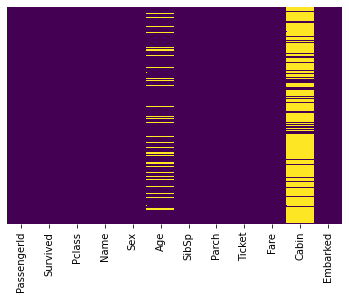

In [ ]:
# Checking for missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap="viridis");

* alot of missing values in Age and Cabin column we'll have to investigate further and eal with them accordingly

In [ ]:
# checking for duplicate reccords
train.duplicated().sum()

0

In [ ]:
# cheking datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking the column names
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Cleaning

In [ ]:
# Finding out the percentage of misssing vale in each column
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000


In [ ]:
missing_value_df['percent_missing'].sum()

97.19416386083053

* the column cabin has too many missing values amounting to 77% which leads to the high number of records with missing values so we'll  have to drop the whole column.

In [ ]:
# getting rid of columns we won't use
trainc = train.drop(['Cabin','PassengerId','Ticket','Name'], axis=1)

In [ ]:
# Finding out the percentage of misssing vale in each column
percent_missing = trainc.isnull().sum() * 100 / len(trainc)
missing_value_df = pd.DataFrame({'column_name': trainc.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Fare,Fare,0.000000
Embarked,Embarked,0.224467


In [ ]:
# let's drop the  records with missing values on the embarked column
trainc.dropna(subset=['Embarked'], how='all', inplace=True)

In [ ]:
# Finding out the percentage of misssing vale in each column
percent_missing = trainc.isnull().sum() * 100 / len(trainc)
missing_value_df = pd.DataFrame({'column_name': trainc.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Sex,Sex,0.000000
Age,Age,19.910011
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Fare,Fare,0.000000
Embarked,Embarked,0.000000


In [ ]:
missing_value_df['percent_missing'].sum()


19.910011248593925

* We'll drop records with null values on the age dataset as well since the pecentage isn't too high. combined with the embarked it's aound 20% so it's safe to drop them.

In [ ]:
trainc.dropna(subset=['Age'], how='all', inplace=True)

In [ ]:
# checking shape of new df vs old df
d=train.shape
c=trainc.shape
print('was:', d,'|||' ' is now:',c)

was: (891, 12) ||| is now: (712, 8)


In [ ]:
# changing column names to lowercase
trainc.columns = trainc.columns.str.lower()
trainc.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

# Exploratory Data Analysis

### Univariate Analysis

In [ ]:
#@title Descriptive statistics
trainc.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
# checking the sum of records of those who suvvived vs died
survival = trainc['survived'].value_counts()
survived = pd.DataFrame(survival)
survived

,survived
0,424
1,288


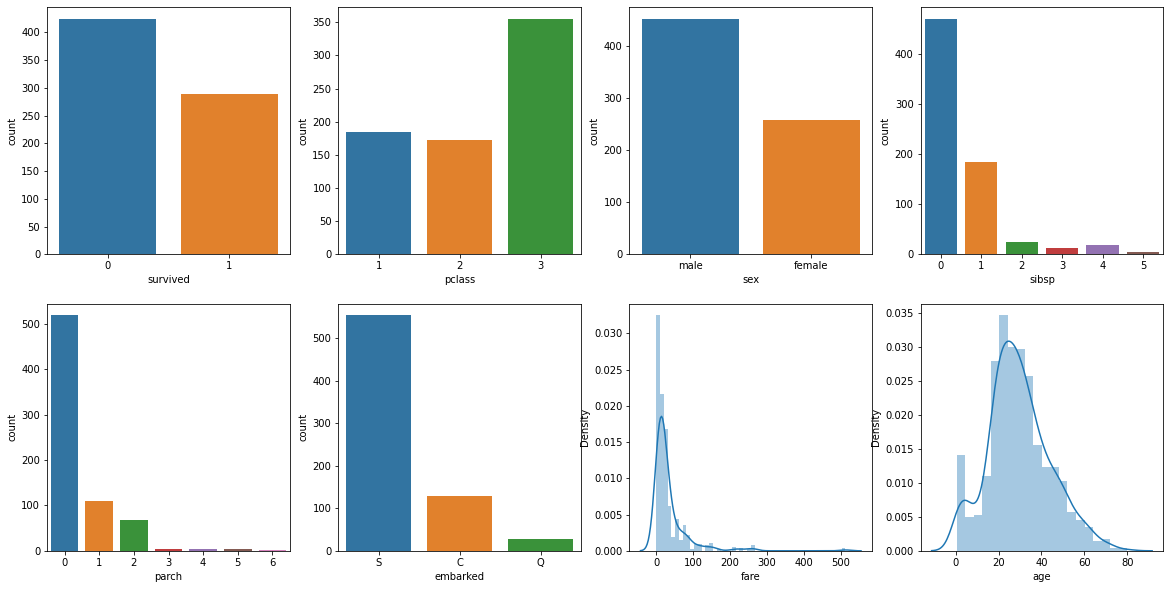

In [ ]:
#@title Univariate summary analysis
# Importing seaborn
import matplotlib.pyplot as plt
%matplotlib inline

# getting rid of warnings
import warnings
warnings.filterwarnings("ignore")
# exploring categorical data using count plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))# we'll use this so we can plot them all in one chart for a cummulative read
sns.countplot('survived',data=trainc,ax=axes[0,0])
sns.countplot('pclass',data=trainc,ax=axes[0,1])
sns.countplot('sex',data=trainc,ax=axes[0,2])
sns.countplot('sibsp',data=trainc,ax=axes[0,3])
sns.countplot('parch',data=trainc,ax=axes[1,0])
sns.countplot('embarked',data=trainc,ax=axes[1,1])

# getting the histograms for continuous data as well
sns.distplot(trainc['fare'], kde=True,ax=axes[1,2])
sns.distplot(trainc['age'].dropna(),kde=True,ax=axes[1,3])
plt.show()

### Bivariate Analysis

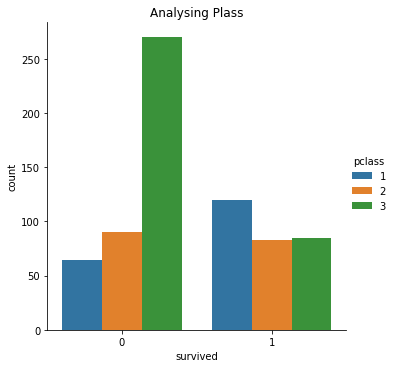

In [ ]:
sns.catplot(x='survived',hue="pclass",data=trainc,kind = "count")
plt.title('Analysing Plass');


* Third class cruisers had the least hance of survival
* First class on the other hand had a higher chance of survival
* 2nd class had a slightly less chance of surviving

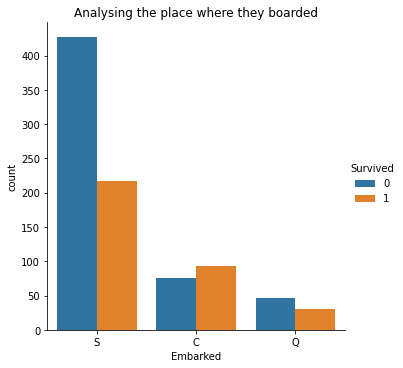

In [ ]:
sns.catplot(x='Embarked',hue="Survived",data=train,kind = "count")
plt.title('Analysing the place where they boarded');

* it's imortant to note that data on station embarkked only makes up a little over 20% of the data due to missing values.
* This infomation therefore is not reiable but it seems to suggest that those who embarked in suthampton had a higher chance of survival.
* It's also important to note that those who embarked in southampton(of the known dataset) make up the biggest proportion as sgown below:

In [ ]:
onboard = train['Embarked'].value_counts()
em = pd.DataFrame(onboard)
em

,Embarked
S,644
C,168
Q,77


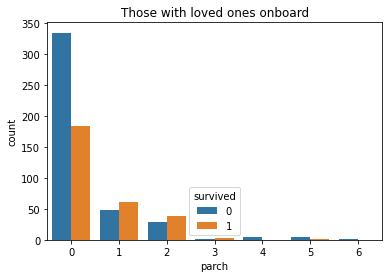

In [ ]:
sns.countplot(trainc['parch'], hue= trainc['survived'])
plt.title('Those with loved ones onboard');

* The plot suggests that individuals with no family members on board had a higher chance of survival.

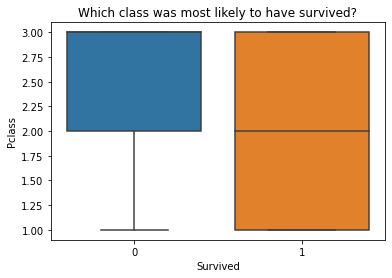

In [ ]:
y=train['Survived']
sns.boxplot(y,train['Pclass'])
plt.title("Which class was most likely to have survived?")
plt.show()


* This boxplot confirms the conclusions made on the earlier class analysis only it sheds light to the fact that most of the people tho did not survive belonged to 2nd and 3rd class

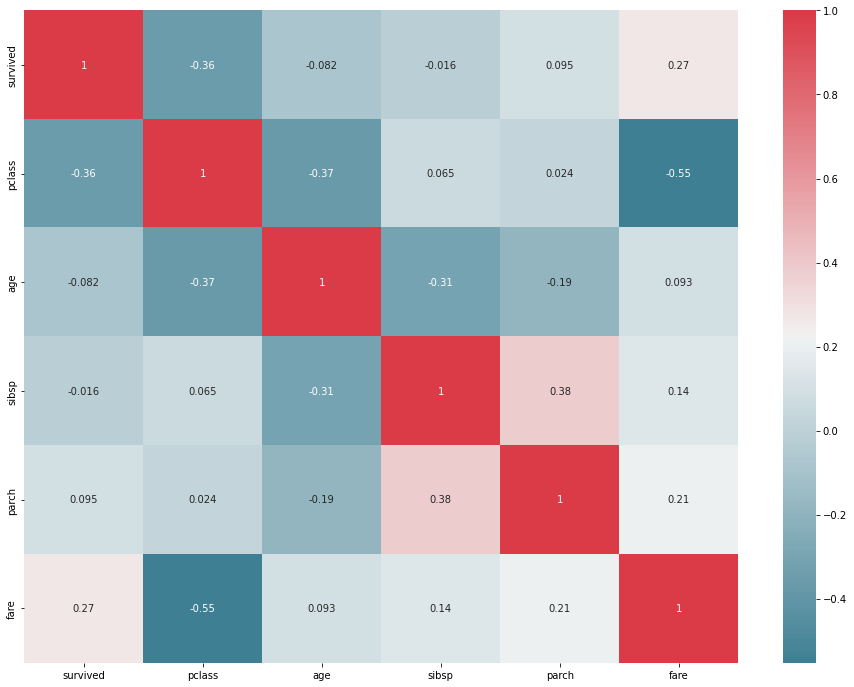

In [ ]:
#@title Correlation
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# plotting
plt.figure(figsize=(16, 12))
sns.heatmap(trainc.corr(), cmap=cmap, annot=True);

* Pclass is slightly negatively correlated to survival
* Fare is slighly possitively correlated to survival
* this makes sense because survival is denoted by 1 while death 0 so the higher the fare the survival chance cause 0 < 1
* For the pclass, denoted as 1,2 and 3, the higher the pcass number the lower the suvival number ie 0 

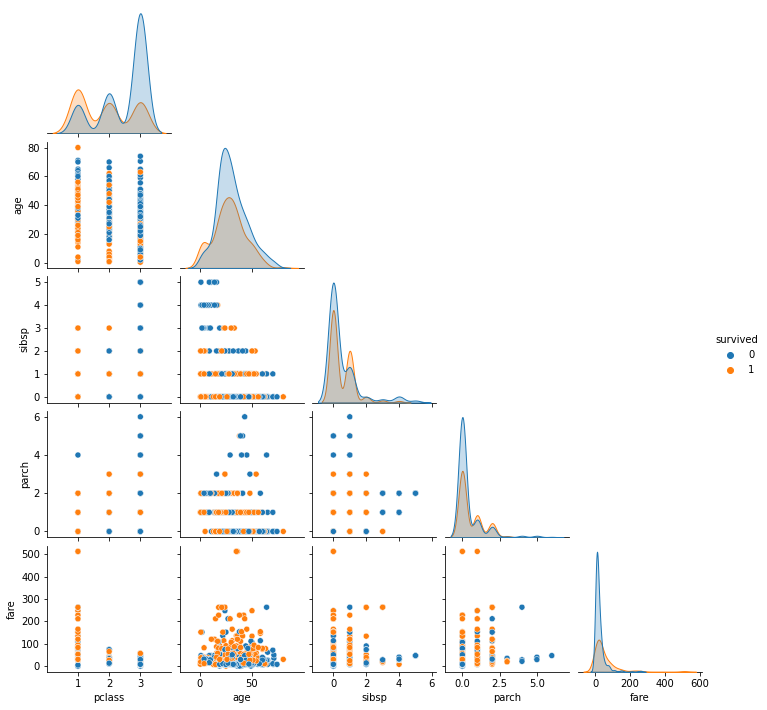

In [ ]:
#@title Bivariate summary analysis
sns.pairplot(trainc, hue="survived",corner=True, height=2);

* there is very little correlation between the numerical columns as earlier confirmed
* the age feature is normally distributed
* The sibs, fare and parch  columns are positively skewed

# Modeling

In [ ]:
#@title Label encoding 
# importing label encoding library
from sklearn.preprocessing import LabelEncoder
LabelEncoder =LabelEncoder()

#defining a function to encode data
trainc['sex']=LabelEncoder.fit_transform(trainc['sex']) 
trainc['embarked']=LabelEncoder.fit_transform(trainc['embarked'])
trainc['sibsp']=LabelEncoder.fit_transform(trainc['sibsp']) 
trainc['parch']=LabelEncoder.fit_transform(trainc['parch']) 
trainc.head(3)


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [ ]:
#@title Multicolinearity

# assigning correlation matrix
corr = trainc.corr()
# generating the VIF
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)
vif

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1.667812,0.540894,0.791505,0.318978,0.164002,0.029553,-0.036724,0.078875
pclass,0.540894,1.924539,0.073845,0.636911,0.024914,-0.146887,0.869581,-0.111345
sex,0.791505,0.073845,1.495281,0.010552,0.064182,0.268041,0.027767,-0.035002
age,0.318978,0.636911,0.010552,1.371802,0.353136,0.066780,0.064595,-0.048087
sibsp,0.164002,0.024914,0.064182,0.353136,1.292595,-0.394258,-0.166550,-0.057079
parch,0.029553,-0.146887,0.268041,0.066780,-0.394258,1.289143,-0.276481,-0.066539
fare,-0.036724,0.869581,0.027767,0.064595,-0.166550,-0.276481,1.642157,0.254411
embarked,0.078875,-0.111345,-0.035002,-0.048087,-0.057079,-0.066539,0.254411,1.118611


In [ ]:
#@title Variance Inflation Factor
# importing vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
#using variance inflation factor to check correlation
k = trainc[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = k.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(k.values, i)
                          for i in range(len(k.columns))]
# displaying dataframe
vif

,feature,vif
0,survived,1.971141
1,pclass,6.308427
2,sex,3.584383
3,age,4.338803
4,sibsp,1.639621
5,parch,1.618658
6,fare,1.888081
7,embarked,5.357841


* We have to deal with the embarked column since it's VIF is higher than 5 indicating high correlation.

* in order to build a suitable model we'll have to drop the age column as well and pclass columns from the dataset

* the variance inflation factors of all variables will now range between values 1-3 which is moderate correlation suitable for modeling.



In [ ]:
#@title VIF - embarked
# importing vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
#using variance inflation factor to check correlation
k = trainc[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = k.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(k.values, i)
                          for i in range(len(k.columns))]
# displaying dataframe
vif

,feature,vif
0,survived,1.943588
1,pclass,4.837881
2,sex,3.511710
3,age,3.983476
4,sibsp,1.623158
5,parch,1.611411
6,fare,1.877707


In [ ]:
#@title VIF - pclass
#using variance inflation factor to check correlation
k = trainc[['survived', 'sex', 'age', 'sibsp', 'parch', 'fare']]
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = k.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(k.values, i)
                          for i in range(len(k.columns))]
# displaying dataframe
vif

,feature,vif
0,survived,1.739597
1,sex,2.507687
2,age,3.390978
3,sibsp,1.508182
4,parch,1.511248
5,fare,1.661725


* after dropping the embarked and pclass fetures the VIF scores are decent and can be used for modeling

# KNN

 * dataset = traind

In [ ]:
# dropping the columns with high correlation
traind = trainc.drop(['embarked','pclass'], axis=1)
traind.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [ ]:
# # we first split the data into the features and labels
# X = trainc.iloc[0, :].values
# y = trainc.iloc[:, 0].values

X = traind.drop('survived', 1)
y = traind.survived

## 80-20 Split

In [ ]:
# Train test split using 80-20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2, random_state = 0)

* As always to avoid over-fitting we divide our dataset into training and test splits
* This way our algorithm is tested on un-seen data

In [ ]:
#@title Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

* we scale the features before making any actual predictions because it is considered good practice so that all of them can be uniformly evaluated.

In [ ]:
#@title Training and Predictions

# importing KNeighboursClassifier
from sklearn.neighbors import KNeighborsClassifier

# initializing the class with k at 5
classifier = KNeighborsClassifier(n_neighbors=5)

# fitting our data to the model
classifier.fit(X_train, y_train)

KNeighborsClassifier()

* We first imported the KNeighborsClassifier class from the sklearn.neighbors library.
* we then initialized that class with one parameter, i.e. n_neigbours.
 * This is basically the value for the K(how many neighbours to check for).There is no ideal value for K and it is selected after testing and evaluation.
We use 5 beacuse it seems to be the most commonly used value for KNN algorithm.

In [ ]:
#@title Making predictions on our test data

y_pred = classifier.predict(X_test)
error= (y_pred-y_test)
# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(10)

,Actual,Prediction,Error
423,0,0,0
178,0,0,0
305,1,1,0
292,0,0,0
592,0,0,0
595,0,0,0
472,1,1,0
54,0,0,0
456,0,0,0
111,0,1,1


__________________________________________________________
CONFUSION MATRIX: 
__________________________________________________________
[[68 14]
 [16 45]]
__________________________________________________________
CLASSIFICATION REPORT: 
__________________________________________________________
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        82
           1       0.76      0.74      0.75        61

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



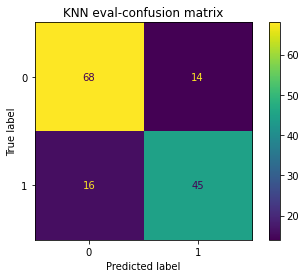

In [ ]:
#@title Evaluating the Algorithm

#importing metrics
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,accuracy_score, f1_score

#displaying confusion matrix
print('__________________________________________________________')
print('CONFUSION MATRIX: ')
print('__________________________________________________________')

print(confusion_matrix(y_test, y_pred))

print('__________________________________________________________')
print('CLASSIFICATION REPORT: ')
print('__________________________________________________________')

# displaying classification report
print(classification_report(y_test, y_pred))

# plotting confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.title('KNN eval-confusion matrix');


* The KNN model's accuracy is at 79% while using the 80 - 20 split.

* Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5.
* Lets check the accuracies over various values of n_neighbours using the below for loop.

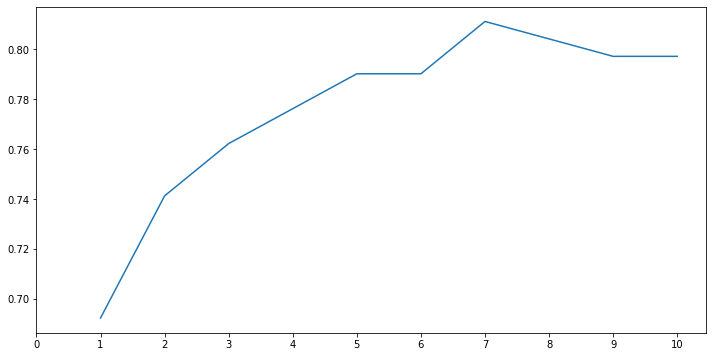

Accuracies for different values of n:  [0.69230769 0.74125874 0.76223776 0.77622378 0.79020979 0.79020979
 0.81118881 0.8041958  0.7972028  0.7972028 ] |||| Max value:  0.8111888111888111


In [ ]:
# creating a list of values for n_neighbors
a_index=list(range(1,11))
# creating an empty series for the accuracy scores
a=pd.Series()
# creating a list for plotting
x=[0,1,2,3,4,5,6,7,8,9,10]

# inishiating the iteration
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))

# plotting the accuracy graph
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n: ',a.values,'|||| Max value: ',a.values.max())

* n_neighbours = 7 gives the highest accuracy score of 81% at 80-20 split

In [ ]:
# Verifying the above statement
#@title Using Optimum n
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2, random_state = 0)

# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# training and predictions
# initializing the class with k at 7
classifier = KNeighborsClassifier(n_neighbors=7)

# fitting our data to the model
classifier.fit(X_train, y_train)

# fitting our data to the model
classifier.fit(X_train, y_train)

# Making predictions on our test data
y_pred = classifier.predict(X_test)
# displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        82
           1       0.79      0.75      0.77        61

    accuracy                           0.81       143
   macro avg       0.81      0.80      0.81       143
weighted avg       0.81      0.81      0.81       143



* On changing the value of n_neighbors to 7 we now have a higher accuracy score of 81% as expected

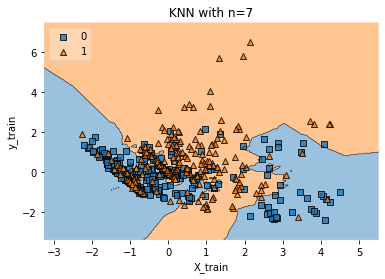

In [ ]:
#@title Deciision region viz
# We first have to run a Principle component Analysis to reduce the fetures to a single array
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_trainb = pca.fit_transform(X_train)

# Importing Libraries neccesary for visualization. 
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
# resettin X n Y
X = X_trainb
y = y_train.values
# initializing and fitting
clf = neighbors.KNeighborsClassifier(n_neighbors=7)
clf.fit(X, y)


# Plotting decision region
plot_decision_regions(X, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel("X_train")
plt.ylabel('y_train')
plt.title('KNN with n=7')
plt.show()

## 70 - 30 Split

In [ ]:
#@title Training and Predicting
X = traind.drop('survived', 1)
y = traind.survived

# Train test split using 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .3, random_state = 0)

# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# training and predictions
# initializing the class with k at 5
classifier = KNeighborsClassifier(n_neighbors=5)

# fitting our data to the model
classifier.fit(X_train, y_train)

# fitting our data to the model
classifier.fit(X_train, y_train)

# Making predictions on our test data
y_pred = classifier.predict(X_test)
error= (y_pred-y_test)
# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(5)

,Actual,Prediction,Error
423,0,0,0
178,0,0,0
305,1,1,0
292,0,0,0
592,0,0,0


__________________________________________________________
CONFUSION MATRIX: 
__________________________________________________________
[[95 30]
 [30 59]]
__________________________________________________________
CLASSIFICATION REPORT: 
__________________________________________________________
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       125
           1       0.66      0.66      0.66        89

    accuracy                           0.72       214
   macro avg       0.71      0.71      0.71       214
weighted avg       0.72      0.72      0.72       214



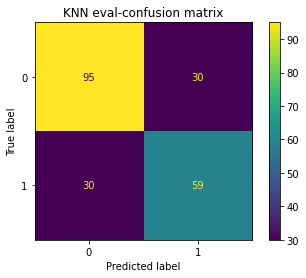

In [ ]:
#@title Evaluation
#displaying confusion matrix
print('__________________________________________________________')
print('CONFUSION MATRIX: ')
print('__________________________________________________________')

print(confusion_matrix(y_test, y_pred))

print('__________________________________________________________')
print('CLASSIFICATION REPORT: ')
print('__________________________________________________________')

# displaying classification report
print(classification_report(y_test, y_pred))

# plotting confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.title('KNN eval-confusion matrix');

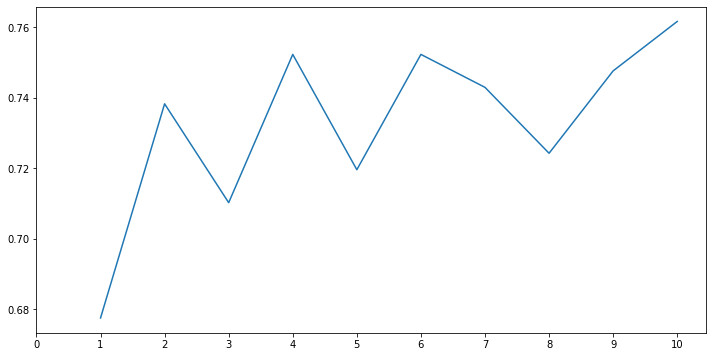

Accuracies for different values of n:  [0.67757009 0.73831776 0.71028037 0.75233645 0.71962617 0.75233645
 0.74299065 0.72429907 0.74766355 0.76168224] |||| Max value:  0.7616822429906542


In [ ]:
# creating a list of values for n_neighbors
a_index=list(range(1,11))
# creating an empty series for the accuracy scores
a=pd.Series()
# creating a list for plotting
x=[0,1,2,3,4,5,6,7,8,9,10]

# inishiating the iteration
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))

# plotting the accuracy graph
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n: ',a.values,'|||| Max value: ',a.values.max())

* 76% seems to be the best score we can get using the 70 - 30 split by setting n_neighbours to 10

In [ ]:
#@title using optimum n
X = traind.drop('survived', 1)
y = traind.survived

# Train test split using 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .3, random_state = 0)

# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# training and predictions
# initializing the class with k at 10
classifier = KNeighborsClassifier(n_neighbors=10)

# fitting our data to the model
classifier.fit(X_train, y_train)

# fitting our data to the model
classifier.fit(X_train, y_train)

# Making predictions on our test data
y_pred = classifier.predict(X_test)
# displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       125
           1       0.73      0.69      0.71        89

    accuracy                           0.76       214
   macro avg       0.76      0.75      0.75       214
weighted avg       0.76      0.76      0.76       214



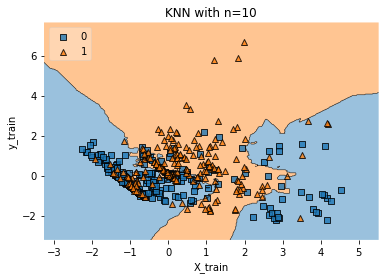

In [ ]:
#@title Decision region viz
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_trainb = pca.fit_transform(X_train)

# Importing Libraries neccesary for visualization. 
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
# resettin X n Y
X = X_trainb
y = y_train.values
# initializing and fitting
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(X, y)


# Plotting decision region
plot_decision_regions(X, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel("X_train")
plt.ylabel('y_train')
plt.title('KNN with n=10')
plt.show()

## 60 - 40 Split

In [ ]:
#@title Training and Predicting
X = traind.drop('survived', 1)
y = traind.survived

# Train test split using 60-40 split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .4, random_state = 0)

# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# training and predictions
# initializing the class with k at 5
classifier = KNeighborsClassifier(n_neighbors=5)

# fitting our data to the model
classifier.fit(X_train, y_train)

# fitting our data to the model
classifier.fit(X_train, y_train)

# Making predictions on our test data
y_pred = classifier.predict(X_test)
error= (y_pred-y_test)
# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(5)

,Actual,Prediction,Error
423,0,0,0
178,0,0,0
305,1,1,0
292,0,0,0
592,0,0,0


__________________________________________________________
CONFUSION MATRIX: 
__________________________________________________________
[[140  29]
 [ 29  87]]
__________________________________________________________
CLASSIFICATION REPORT: 
__________________________________________________________
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       169
           1       0.75      0.75      0.75       116

    accuracy                           0.80       285
   macro avg       0.79      0.79      0.79       285
weighted avg       0.80      0.80      0.80       285



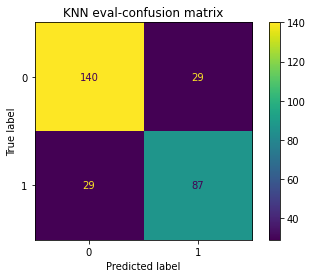

In [ ]:
#@title Evaluation
#displaying confusion matrix
print('__________________________________________________________')
print('CONFUSION MATRIX: ')
print('__________________________________________________________')

print(confusion_matrix(y_test, y_pred))

print('__________________________________________________________')
print('CLASSIFICATION REPORT: ')
print('__________________________________________________________')

# displaying classification report
print(classification_report(y_test, y_pred))

# plotting confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.title('KNN eval-confusion matrix');

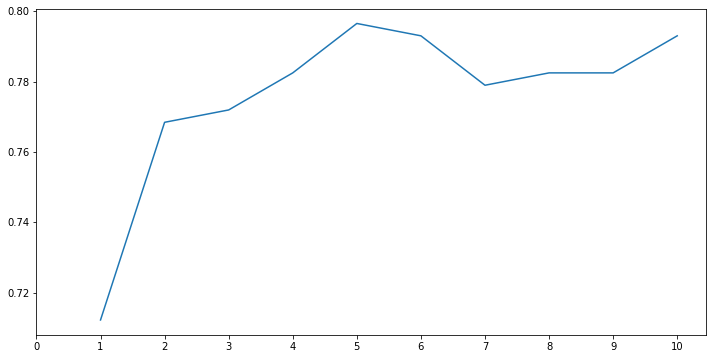

Accuracies for different values of n:  [0.7122807  0.76842105 0.77192982 0.78245614 0.79649123 0.79298246
 0.77894737 0.78245614 0.78245614 0.79298246] |||| Max value:  0.7964912280701755


In [ ]:
# creating a list of values for n_neighbors
a_index=list(range(1,11))
# creating an empty series for the accuracy scores
a=pd.Series()
# creating a list for plotting
x=[0,1,2,3,4,5,6,7,8,9,10]

# inishiating the iteration
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))

# plotting the accuracy graph
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n: ',a.values,'|||| Max value: ',a.values.max())

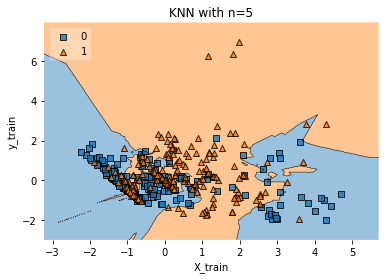

In [ ]:
#@title Decision region viz
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_trainb = pca.fit_transform(X_train)

# Importing Libraries neccesary for visualization. 
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
# resettin X n Y
X = X_trainb
y = y_train.values
# initializing and fitting
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)


# Plotting decision region
plot_decision_regions(X, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel("X_train")
plt.ylabel('y_train')
plt.title('KNN with n=5')
plt.show()

######**Conclusion on Splits**
The accuracy results for the models are:

* **80 - 20:** <br> <font color = green>81%</font>


---



* **70 - 30:** <br> <font color = green>76%</font>


---


* **60 - 40:**  <br> <font color = green>80%</font>



# Challanging the solution

* Since we already label encoded our dataset we're going to try and use KNNregressor model and see whether that one performs better.

In [ ]:
#@title KNN Regressor
# splitting into features and labels once more
X = trainc.drop('survived', 1)
y = trainc.survived

# Train Test Split (We will use an 80-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Training our algorithm
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

# make predictions on our test data
y_pred = clf.predict(X_test)

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.2708200890019072
Mean Squared Error: 0.14633300583713807
Root Mean Squared Error: 0.38253497335163755


The errors seem to be very minimal although I didn't find any standard way of comparing classifcation models to regression ones in order to gauge the best in regard to our dataset.

* Next we're going to try using SVR which is the regressor version of SVM(support Vector Machine)
* As the name suggest the SVR is an regression algorithm , so we can use SVR for working with continuous Values instead of Classification which is SVM.
* Supervised Machine Learning Models with associated learning algorithms that analyze data for classification and regression analysis are known as Support Vector Regression. SVR is built based on the concept of Support Vector Machine or SVM

In [ ]:
#@title SVR Regressor
from sklearn.svm import SVR

# First, let's choose which kernel is the best for our data

for k in ['linear','poly','rbf','sigmoid']:
    clf = SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

# Parameter Tuning to get the best accuracy
svr=SVR(kernel='rbf', C=1, gamma= 0.5) 
svr.fit(X_train,y_train) 

linear 0.214432367072645
poly 0.4595311744421945
rbf 0.5177119628536422
sigmoid -220.58656962830727


SVR(C=1, gamma=0.5)

* the gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
* The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
* For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
* A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
* In other words C behaves as a regularization parameter in the SVM.

In [ ]:
# printing the evaluation metric for svr regresor
print(svr.score(X_train,y_train))

# print the first 5 predictions of our test set
svr_pred = svr.predict(X_test)
error= (svr_pred-y_test)
# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': svr_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(5)

0.5867811577372843


,Actual,Prediction,Error
423,0,0.101883,0.101883
178,0,0.094857,0.094857
305,1,0.775022,-0.224978
292,0,0.082095,0.082095
592,0,0.099004,0.099004


# Conclusion
* Regression models don't seem to be built for this type of data. 
* The 70 - 30 split's best n value is 10 wike the 60 - 40 ones is 5 that is in the range of 1 - 10.
* Further investigation should be done on what standard metric can be used to compare regression reults to classification model ones.

# Recommendations
* For this specific dataset I would recommend using the 80 - 20 split, that way the data has enough data to train on and setting n_neighbours parameter to 7.
* When visualising the decision region, I would recommend the use of a reduction technique, specifically Principle component Analysis to reduce the fetures to a single array so it's able to plot.

### **Follow up questions**
**a). Did we have the right data?**

We had the right data since KNN classifie is the model of instruction and the dataset had several categorical features

**b). Do we need other data to answer our question?**

The data was enough to make our predictions

**c). Did we have the right question?**

The question was right.